# Lesson 1 Assignment - EnergyLoads
## Author - Salinee Kingbaisomboon
### UW NetID: 1950831

### Instructions
In this exercise you will use visualization and summary statistical methods to explore a data set. You will be looking for interesting aspects in these data. Specifically, you will explore an energy efficiency data set.

This data set contains characteristics of over 750 buildings. The efficiency of the building is measured as either heating load or cooling load. Your goal is to find **three interesting relationships within the variables** which help you understand the energy efficiency of these buildings.

The exercise is deliberately open-ended. Whenever you approach a new data set some open-ended exploration is required. Expect this exploration to be an iterative process. You may need to try several ideas before you find truly interesting relationships.

The key points come from examining charts and summary statistics based on distribution Heating Load and Cooling Load. 
<font color="blue">At the end of this notebook include Markdown cells outlining your 3 key points.</font>

Example description:  The heating load of buildings depends on ... Evidence for this relationship can be seen by ... in the figure and by noting .... in the table above. 


# Tip: 
There are no categorical variables in this data set. There are two numeric variables, Orientation and Glazing Area Distribution, with only 4 and 2 discrete values. You can convert these integer values to factors and examine the effect on the distribution of Heating Load and Cooling Load.

In [67]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore") # To suppress warning for violin plots when python version is < 3.7

%matplotlib inline

In [68]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/EnergyEfficiencyData.csv"

energy_efficiency = pd.read_csv(fileName)

columns = ['Orientation', 'Glazing Area Distribution']

## Convert some columns to numeric values
for column in columns:
    energy_efficiency[column] = pd.to_numeric(energy_efficiency[column])

# Data Characteristics

- ### Data Frame Dimensions

In [69]:
print(energy_efficiency.shape)

(768, 10)


- ## Data Frame Data Types

In [70]:
print(energy_efficiency.dtypes)

Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Heating Load                 float64
Cooling Load                 float64
dtype: object


# Summary statistics

In [71]:
energy_efficiency.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


# Three Key Points

## 1. Glazing Area has positive relationship with Cooling Load

The cooling load of buildings depends on `Glazing Area` in the same direction (positive relationship). Evidence for this relationship can be seen by `Violin plots` in the following figure and by noting in the table below. 

Text(0, 0.5, 'Cooling Load')

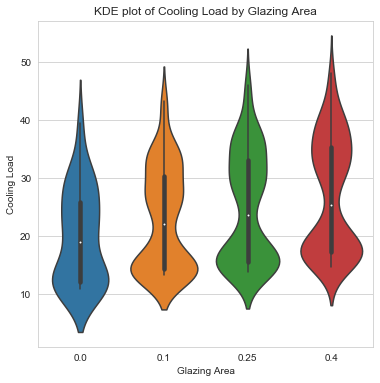

In [72]:
fig = plt.figure(figsize=(6,6)) # Define plot area
ax = fig.gca() # Define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'Glazing Area', y = 'Cooling Load', data = energy_efficiency, ax = ax)
ax.set_title('KDE plot of Cooling Load by Glazing Area') # Give the plot a main title
ax.set_xlabel('Glazing Area') # Set text for the x axis
ax.set_ylabel('Cooling Load')# Set text for y axis

In [73]:
energy_efficiency[['Glazing Area','Cooling Load']].sort_values(by=['Glazing Area', 'Cooling Load'], ascending=False).head(768)

,Glazing Area,Cooling Load
595,0.4,48.03
689,0.4,47.59
738,0.4,47.01
547,0.4,46.94
640,0.4,46.44
...,...,...
28,0.0,11.27
25,0.0,11.19
27,0.0,11.17
26,0.0,10.94


***
**Note:** This finding lead us to the conclusion that the more glazing area of the building external is, the more heat the system need to remove to maintain the air temperature & humidity (Cooling load).
***

# 2. Wall Area has positive relationships with Heating Load

The heating load of buildings depends on `Wall Area` in the same direction (positive relationship). Evidence for this relationship can be seen by `Box plots` in the following figure and by noting in the table below. 

(0.0, 50.0)

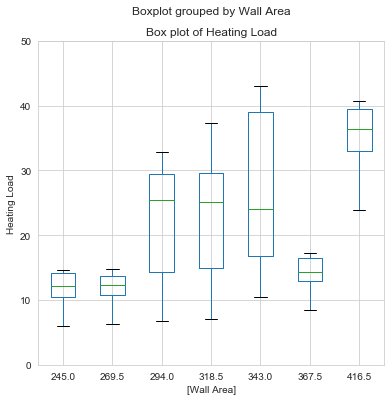

In [74]:
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis 
energy_efficiency.loc[:,['Heating Load', 'Wall Area']].boxplot(by = 'Wall Area', ax = ax)
ax.set_title('Box plot of Heating Load') # Give the plot a main title
ax.set_ylabel('Heating Load')# Set text for y axis
ax.set_ylim(0.0, 50.0) # Set the limits of the y axis

In [75]:
energy_efficiency[['Wall Area','Heating Load']].sort_values(by=['Wall Area', 'Heating Load'], ascending=False).head(768)

,Wall Area,Heating Load
548,416.5,40.78
596,416.5,40.78
550,416.5,40.71
692,416.5,40.68
694,416.5,40.60
...,...,...
218,245.0,10.07
24,245.0,6.07
25,245.0,6.05
27,245.0,6.04


***
**Note:** This finding lead us to the conclusion that the more wall area of the building's external has, the more amount of heating that a building needs in order to maintain the indoor temperature at established levels (Heating Load).
***

# 3. Roof Area has positive relationships with Cooling Load

The cooling load of buildings depends on `Roof Area` in the same direction (positive relationship). Evidence for this relationship can be seen by `Violin plots` in the figure below. 

Text(0, 0.5, 'Cooling Load')

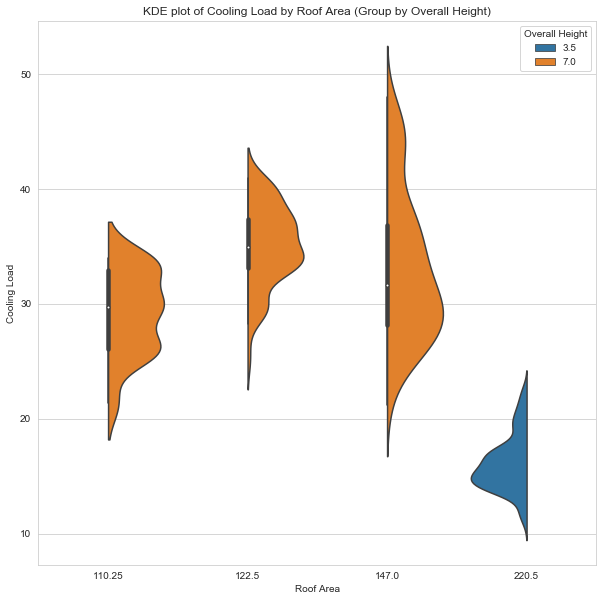

In [76]:
fig = plt.figure(figsize=(10, 10)) # Define plot area
ax = fig.gca() # Define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'Roof Area', y = 'Cooling Load', hue = 'Overall Height', split = True, data = energy_efficiency, ax = ax)
ax.set_title('KDE plot of Cooling Load by Roof Area (Group by Overall Height)') # Give the plot a main title
ax.set_xlabel('Roof Area') # Set text for the x axis
ax.set_ylabel('Cooling Load')# Set text for y axis

***
**Note:** This finding lead us to the conclusion that the more roof area of the building external is, the more heat the system need to remove to maintain the air temperature & humidity (Cooling load). We also found an interesting point from this plot. We can see that from the data, the buildings which has more roof area happen to have lower of building's overall heigh.
***